In [1]:
import pandas as pd

In [4]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
                "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv('adult.data', names = column_names)

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [5]:
df = pd.concat([X, y], axis=1)
df.columns = column_names

In [6]:
print(df.isna().sum())

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [502]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [503]:
missing_data_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing data:", missing_data_columns)

Columns with missing data: []


In [504]:
for col in missing_data_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [505]:
df = df.drop_duplicates()
duplicates = df.duplicated()
print(duplicates.sum())

0


In [506]:
df["sex"] = df["sex"].astype('category')
print(df["sex"].describe())

count     32537
unique        2
top        Male
freq      21775
Name: sex, dtype: object


In [507]:
print(df[df["age"] < 20])

       age workclass  fnlwgt      education  education-num  \
26      19   Private  168294        HS-grad              9   
37      19   Private  544091        HS-grad              9   
51      18   Private  226956        HS-grad              9   
70      19   Private  101509   Some-college             10   
78      18   Private  309634           11th              7   
...    ...       ...     ...            ...            ...   
32392   18   Private  200047           12th              8   
32437   19   Private   60890        HS-grad              9   
32443   18   Private   41381        HS-grad              9   
32447   17   Private  117798           10th              6   
32496   18   Private  436163           11th              7   

           marital-status       occupation    relationship    race      sex  \
26          Never-married     Craft-repair       Own-child   White     Male   
37      Married-AF-spouse     Adm-clerical            Wife   White   Female   
51          Never-

In [508]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32537 non-null  int64   
 1   workclass       32537 non-null  object  
 2   fnlwgt          32537 non-null  int64   
 3   education       32537 non-null  object  
 4   education-num   32537 non-null  int64   
 5   marital-status  32537 non-null  object  
 6   occupation      32537 non-null  object  
 7   relationship    32537 non-null  object  
 8   race            32537 non-null  object  
 9   sex             32537 non-null  category
 10  capital-gain    32537 non-null  int64   
 11  capital-loss    32537 non-null  int64   
 12  hours-per-week  32537 non-null  int64   
 13  native-country  32537 non-null  object  
 14  income          32537 non-null  object  
dtypes: category(1), int64(6), object(8)
memory usage: 3.8+ MB
None


In [511]:
df["workclass"] = df["workclass"].replace(" ?", " Private")
print(df.workclass.value_counts())

workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


In [512]:
df["occupation"] = df["occupation"].replace(" ?", " Prof-specialty")
df.occupation.value_counts()

occupation
 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: count, dtype: int64

In [513]:
df["native-country"] = df["native-country"].replace(" ?", ' United-States')
df["native-country"].value_counts()


native-country
 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                

In [514]:
rows_with_question_mark = df[df.apply(lambda x: x == ' ?').any(axis=1)]
rows_with_question_mark

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [515]:
print(df.describe(exclude='number'))

       workclass education       marital-status       occupation relationship  \
count      32537     32537                32537            32537        32537   
unique         8        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       24509     10494                14970             5979        13187   

          race    sex  native-country  income  
count    32537  32537           32537   32537  
unique       5      2              41       2  
top      White   Male   United-States   <=50K  
freq     27795  21775           29735   24698  


D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


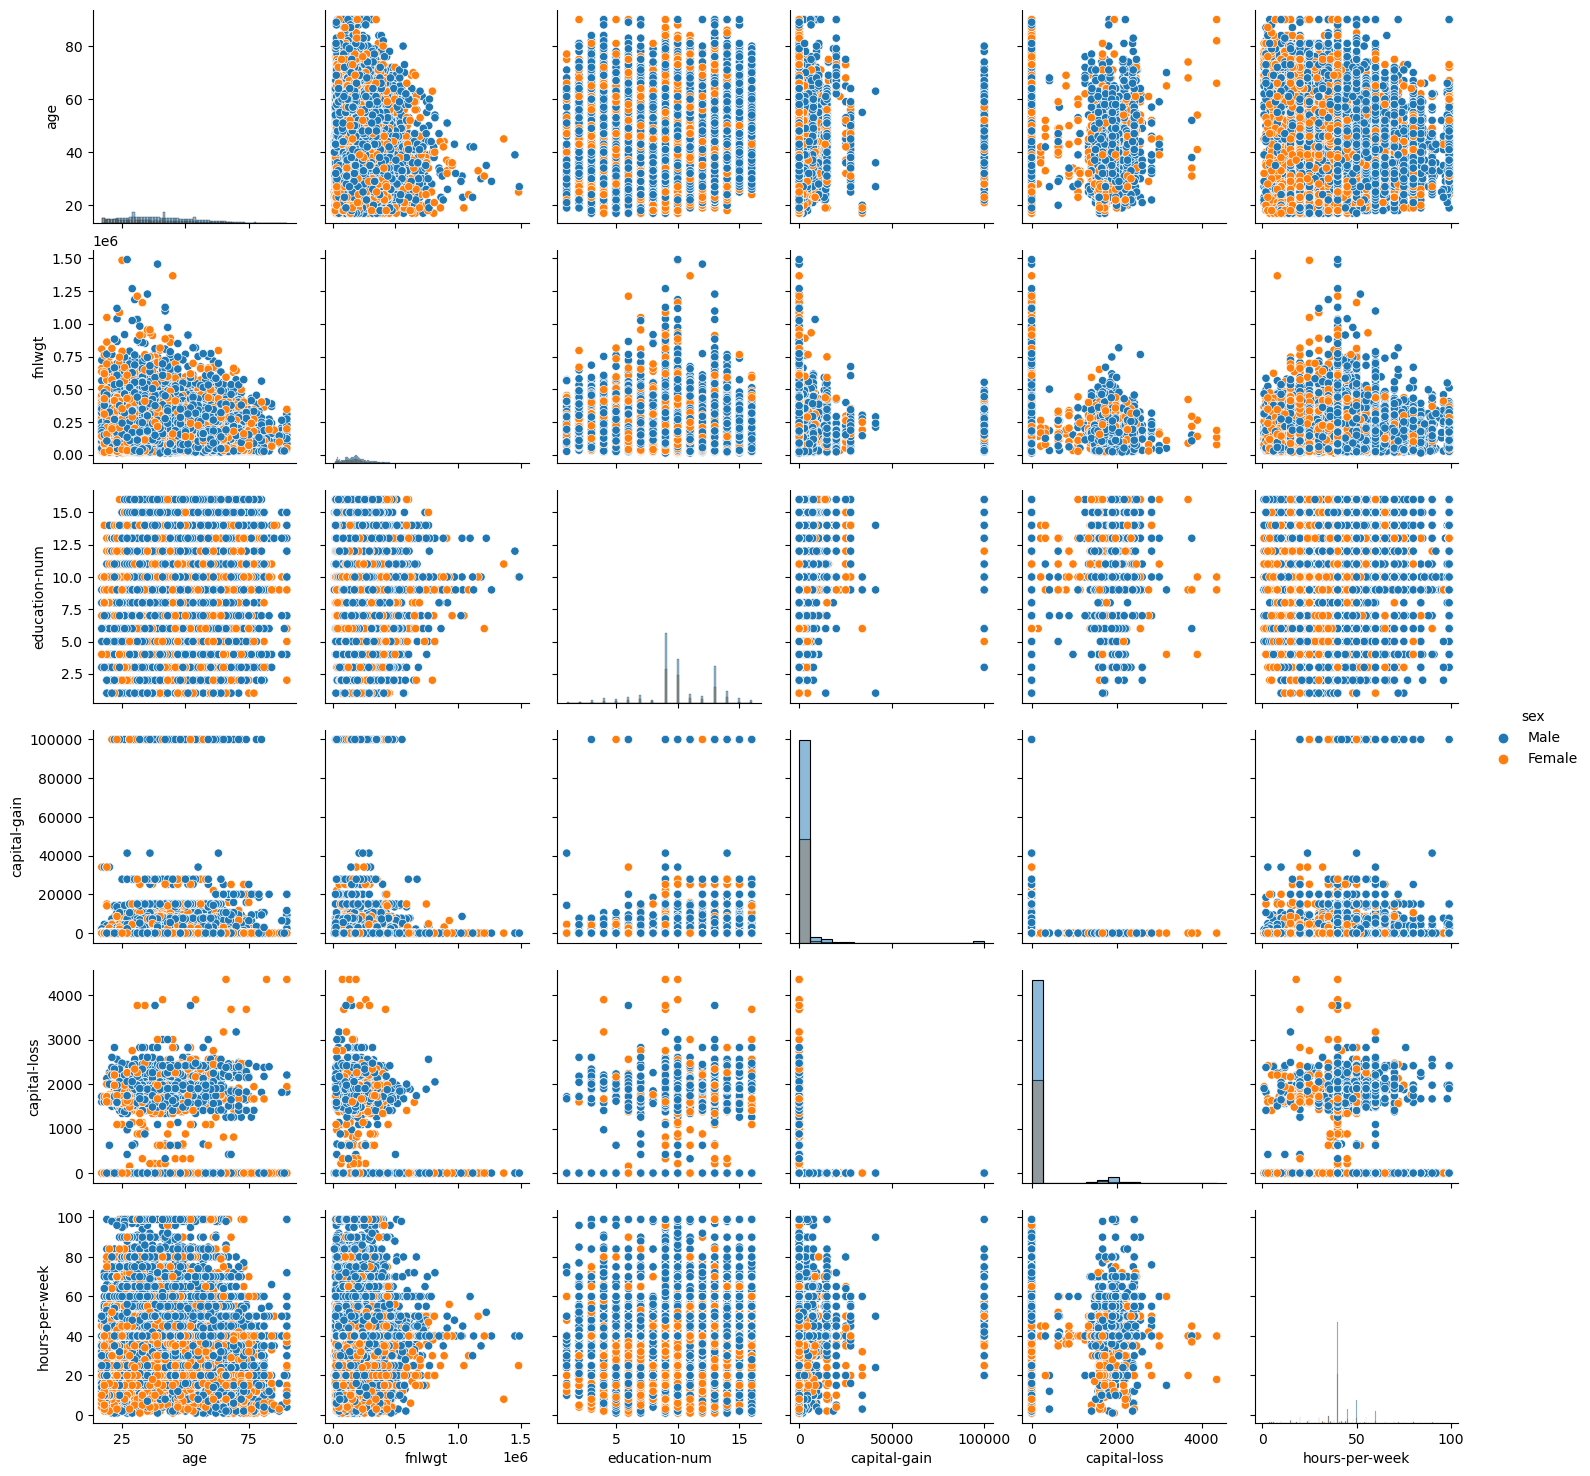

In [386]:
import seaborn as sns
sns.pairplot(df, hue="sex", diag_kind='hist')

In [516]:
normalized_df = df.select_dtypes(include=['number']) / df.select_dtypes(include=['number']).mean()
print(normalized_df.var())


age                0.124925
fnlwgt             0.309361
education-num      0.065064
capital-gain      46.930349
capital-loss      21.287394
hours-per-week     0.093215
dtype: float64


In [517]:
print(df.select_dtypes(include=['number']).corr())

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076447       0.036224      0.077676      0.057745   
fnlwgt         -0.076447  1.000000      -0.043388      0.000429     -0.010260   
education-num   0.036224 -0.043388       1.000000      0.122664      0.079892   
capital-gain    0.077676  0.000429       0.122664      1.000000     -0.031639   
capital-loss    0.057745 -0.010260       0.079892     -0.031639      1.000000   
hours-per-week  0.068515 -0.018898       0.148422      0.078408      0.054229   

                hours-per-week  
age                   0.068515  
fnlwgt               -0.018898  
education-num         0.148422  
capital-gain          0.078408  
capital-loss          0.054229  
hours-per-week        1.000000  


In [518]:
print(df.select_dtypes(include=['number']))

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32537 rows x 6 columns]


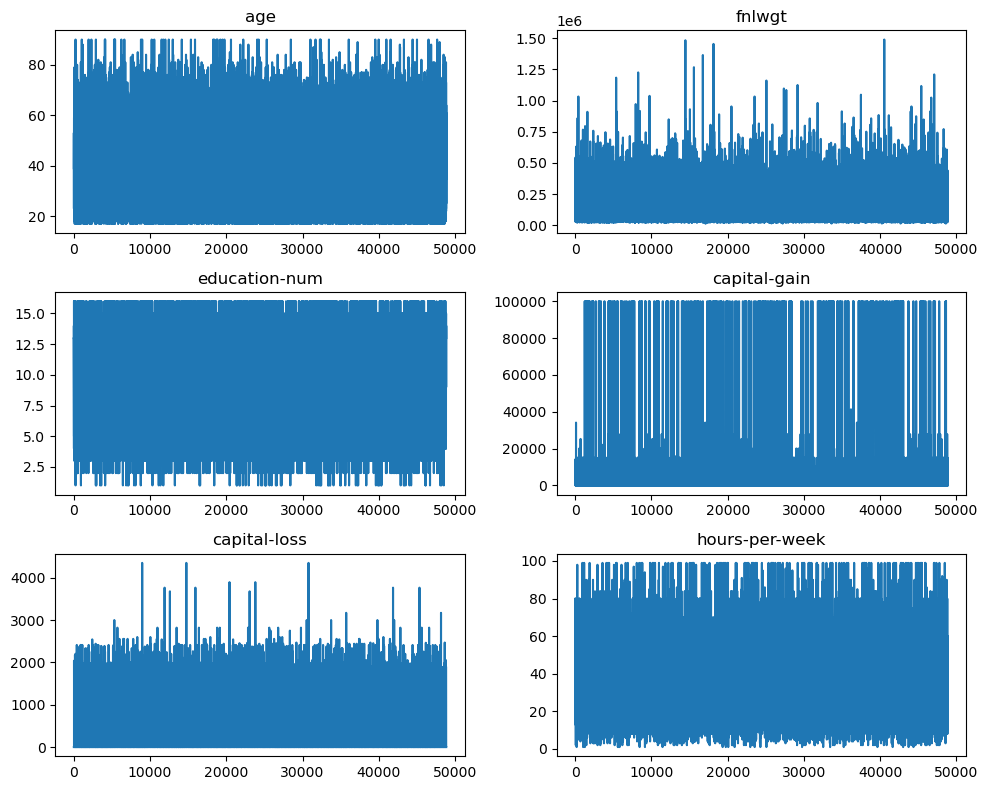

In [476]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
df_col_names = df.select_dtypes(include='number').columns.tolist()
s = 0

# Plot on each subplot
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i, j]
        ax.plot(df.index, df[df_col_names[s]])
        ax.set_title(df_col_names[s])
        s += 1

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()

In [453]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers using z-score method.
    
    Parameters:
        data (array-like): Input data.
        threshold (float): Z-score threshold for identifying outliers.
    
    Returns:
        array: Boolean array indicating whether each data point is an outlier.
    """
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Calculate z-scores for each data point
    z_scores = (data - mean) / std_dev
    
    # Identify outliers based on threshold
    outliers = np.abs(z_scores) > threshold
    
    return outliers


In [318]:
df_col_names = df.select_dtypes(include='number').columns.tolist()
for col in df_col_names:
    print(col)
    data = df[col]
    outliers = detect_outliers_zscore(data)
    print("Outliers detected:", data[outliers])
    df = df[~outliers]

age
Outliers detected: 222      90
430      80
918      81
1040     90
1168     88
         ..
32277    90
32367    90
32459    85
32494    82
32525    81
Name: age, Length: 120, dtype: int64
fnlwgt
Outliers detected: 37       544091
40       507875
182      633742
192      523910
215      635913
          ...  
31811    746432
32035    566537
32205    693066
32208    539864
32511    514716
Name: fnlwgt, Length: 345, dtype: int64
education-num
Outliers detected: 160      2
221      2
224      1
416      2
463      2
        ..
32306    2
32359    1
32403    2
32425    2
32432    1
Name: education-num, Length: 206, dtype: int64
capital-gain
Outliers detected: 106      34095
704      25236
1246     99999
1368     99999
1482     99999
         ...  
31972    99999
32090    99999
32238    99999
32370    27828
32518    99999
Name: capital-gain, Length: 212, dtype: int64
capital-loss
Outliers detected: 23       2042
32       1408
52       1902
93       1573
96       1902
         ... 
32416 

In [266]:
for col in df_col_names:
    print(col)
    data = df[col]
    outliers = detect_outliers_zscore(data)
    print("Outliers detected:", data[outliers])

age
Outliers detected: 74       79
3338     79
4720     79
6000     79
6173     79
8176     79
8522     79
11099    79
11532    79
14903    79
16523    79
17609    79
18141    79
19828    79
20483    79
20880    79
21343    79
23900    79
25163    79
26242    79
28176    79
Name: age, dtype: int64
fnlwgt
Outliers detected: 177      483777
275      477983
369      481060
699      475028
836      499233
          ...  
31808    470368
31862    499935
31957    473625
32286    478315
32470    485710
Name: fnlwgt, Length: 166, dtype: int64
education-num
Outliers detected: Series([], Name: education-num, dtype: int64)
capital-gain
Outliers detected: 8        14084
84       14344
101      15024
105       7688
197      14084
         ...  
32341    15831
32365    15024
32466    15024
32538    15020
32560    15024
Name: capital-gain, Length: 893, dtype: int64
capital-loss
Outliers detected: 825       653
2907     1138
3503      625
3667      213
4424      880
4504      625
4854     1092
5686   

In [521]:
from scipy.stats import skew
for col in df_col_names:
    data_skewness = skew(df[col])
    print("Skewness:", data_skewness)

Skewness: 0.5576374421375199
Skewness: 1.4476361664196729
Skewness: -0.30948599142388744
Skewness: 11.948851942756669
Skewness: 4.592490690725554
Skewness: 0.22874833162171837


In [522]:
trans_cols = ['capital-gain', 'capital-loss']
for x in range(2):
    for col in trans_cols:
        df[col] = df[col].replace(0, 1e-6)
        df[col] = df[col].apply(lambda x: x**(1/3))
df['fnlwgt'] = df['fnlwgt'].replace(0, 1e-6)
df['fnlwgt'] = df['fnlwgt'].apply(lambda x: x**0.5)
for col in df_col_names:
    data_skewness = skew(df[col])
    print("Skewness:", data_skewness)

Skewness: 0.5576374421375199
Skewness: 0.18963890688796348
Skewness: -0.30948599142388744
Skewness: 3.1168450644745382
Skewness: 4.30381929943924
Skewness: 0.22874833162171837


In [322]:
print(df[df[]"capital-gain"[]])

       age          workclass  fnlwgt      education  education-num  \
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
...    ...                ...     ...            ...            ...   
32555   22            Private  310152   Some-college             10   
32556   27            Private  257302     Assoc-acdm             12   
32557   40            Private  154374        HS-grad              9   
32558   58            Private  151910        HS-grad              9   
32559   22            Private  201490        HS-grad              9   

            marital-status          occupation    relationship    race  \
1       Married-civ-spouse     Exec-managerial         Husband   White   

In [180]:
def percent_change(values):
    """Calculates the % change between the last value and the mean of previous values"""
    
    # Separate the last value and all previous values into variables
    previous_values = values.iloc[:-1]  # Use .iloc to access elements by position
    last_value = values.iloc[-1]  # Use .iloc to access the last element
    
    # Calculate the mean of previous values
    mean_previous_values = np.mean(previous_values)
    
    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = ((last_value - mean_previous_values) / mean_previous_values) * 100
    
    return percent_change

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
age
38.585548759873376
79.49949931528297
19       15.070423
20        6.442577
21       45.738636
22       -7.638889
23       16.381766
           ...    
32556   -37.818182
32557    -7.542579
32558    33.737864
32559   -48.458693
32560    25.380711
Name: age, Length: 32518, dtype: float64
0.6633851322010451
36.63712842016499
110.57477039269601
193.31046312178387
-65.60170394036209
Series([], Name: age, dtype: float64)
fnlwgt
189780.84851092604
506450.26153940614
19       67.308264
20        4.084009
21       57.588280
22      -60.850074
23      -37.737875
           ...    
32556    39.836444
32557   -13.920640
32558   -15.670603
32559    16.461972
32560    69.030866
Name: fnlwgt, Length: 32518, dtype: float64
1.6059641046849826
58.296573574734865
176.49568482888958
840.0708454369454
-93.85227443326828
Series([], Name: fnlwgt, dtype: float64)
education-num
10.081814549589698
17.796713579801924
19     

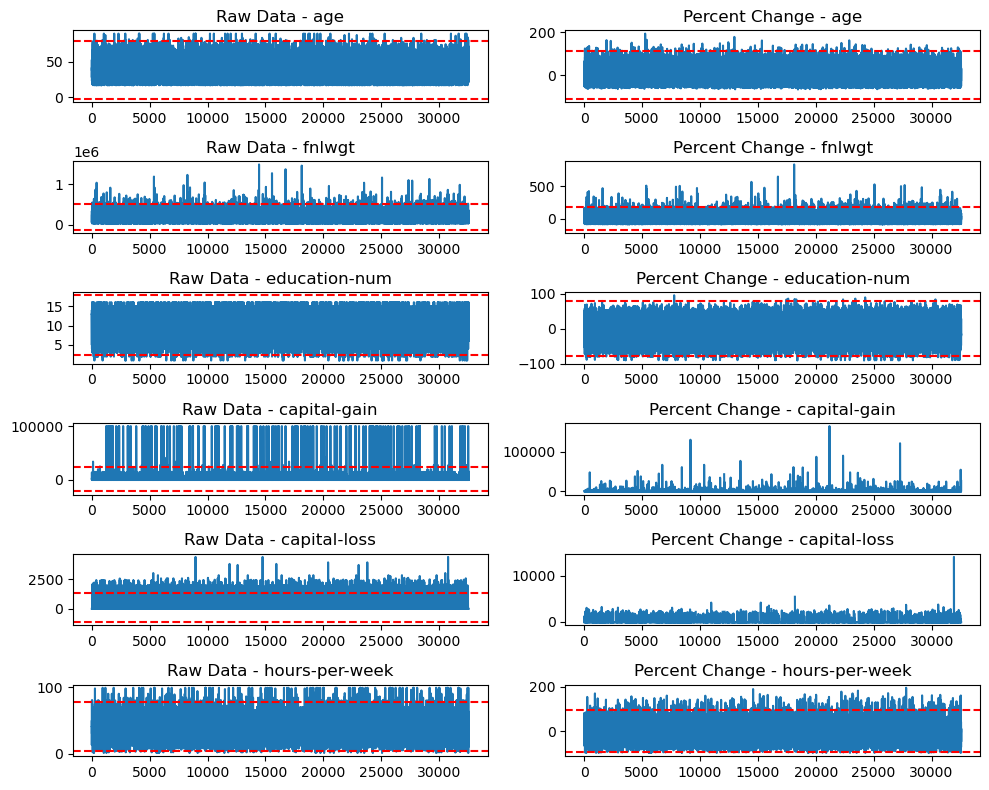

In [196]:
nrows = 6
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))
df_col_names = df.select_dtypes(include='number').columns.tolist()
print(df_col_names)
s = 0

# Plot on each subplot
for i in range(nrows):
    print(df_col_names[s])
    ax_raw_data = axes[i, 0]  # Selecting the left subplot for raw data
    ax_percent_change = axes[i, 1]  # Selecting the right subplot for percent change
    
    this_mean = df[df_col_names[s]].mean()
    this_std = df[df_col_names[s]].std()
    print(this_mean)
    print(this_mean + this_std * 3)
    # Plot the data, with a window that is 3 standard deviations # around the mean    
    df[df_col_names[s]].plot(ax=ax_raw_data)   
    ax_raw_data.axhline(this_mean + this_std * 3, ls='--', c='r')    
    ax_raw_data.axhline(this_mean - this_std * 3, ls='--', c='r')
    ax_raw_data.set_title(f'Raw Data - {df_col_names[s]}')


    percent_change_var = df[df_col_names[s]].rolling(window=20).aggregate(percent_change)
    this_mean = percent_change_var.mean()
    this_std = percent_change_var.std()
    percent_change_var.plot(ax=ax_percent_change)
    ax_percent_change.axhline(this_mean + this_std * 3, ls='--', c='r')  
    print(percent_change_var[~percent_change_var.isna()])
    print(this_mean)
    print(this_std)
    print(this_mean + this_std *3)
    print(percent_change_var.max())
    print(percent_change_var.min())
    print(percent_change_var[percent_change_var == 'inf'])
    ax_percent_change.axhline(this_mean - this_std * 3, ls='--', c='r')
    ax_percent_change.set_title(f'Percent Change - {df_col_names[s]}')
        
    s += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



In [523]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_columns)
label_encoder = LabelEncoder()

print(df.columns)

for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col])

[]
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [524]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['income']), df['income'])

scaler = StandardScaler()

dataset = scaler.fit_transform(X_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, y_resampled, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(clf.feature_importances_)

Accuracy: 0.9214521897563939
Accuracy: 0.999971079040981
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7420
           1       0.89      0.96      0.92      7399

    accuracy                           0.92     14819
   macro avg       0.92      0.92      0.92     14819
weighted avg       0.92      0.92      0.92     14819

[0.16751232 0.03213873 0.14887926 0.03446259 0.08469432 0.11535596
 0.06166597 0.11936794 0.01408539 0.02022048 0.08026744 0.02616354
 0.0814346  0.01375146]


In [20]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=RandomForestClassifier(),
          n_features_to_select=10, verbose=1)
rfe.fit(X_train,y_train)
print(accuracy_score(y_test, rfe.predict(X_test)))
print(accuracy_score(y_train, rfe.predict(X_train)))

0.818479819709076
0.9998682766190999


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# Assuming you have your data loaded into X (features) and y (target variable)
ds_X = df.drop(columns=['income'])
y = df['income']

dataset = scaler.fit_transform(ds_X)

# Create a DataFrame to store the PCA results
X = pd.DataFrame(data=dataset)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
print(clf.feature_importances_)

Accuracy: 0.855459946732227
Accuracy: 0.9999121844127332
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7405
           1       0.74      0.62      0.68      2357

    accuracy                           0.86      9762
   macro avg       0.81      0.78      0.79      9762
weighted avg       0.85      0.86      0.85      9762

[0.15284489 0.03964827 0.16749002 0.03565232 0.08922777 0.07333933
 0.06714431 0.1003015  0.01413961 0.0136938  0.10893101 0.03812579
 0.08474463 0.01471677]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_grid = {
    'n_estimators': randint(10, 1000),  # Number of trees in the forest
    'max_depth': randint(5, 50),         # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Assuming X is your feature matrix and y is your target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train, y_train)

# Predict on the test data
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_train_pred = gnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy:", train_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


In [23]:
import numpy as np

arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6]])
print(arr_2d.shape)

(2, 3)
